***Customer Purchase Behavior & Revenue Analysis***

This project analyzes retail transaction data to understand how customers drive revenue and profit. I combined SQL and Python to clean data, engineer features like revenue and profit, and study sales trends over time. I performed RFM segmentation to classify customers into champions, loyal, at-risk, and lost groups, enabling targeted retention strategies. The analysis shows that a small portion of customers contributes most of the revenue, while some product categories generate higher profit despite lower sales volume. The project demonstrates end-to-end data analysis—from raw data to business recommendations—using realistic, production-style workflows.

In [ ]:
pip install pandas numpy matplotlib seaborn

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# display settings
pd.set_option('display.max_columns', None)

In [4]:
# Create Mock Data (Realistic Retail Data)
np.random.seed(42)

customers = pd.DataFrame({
    'customer_id': range(1, 101),
    'age': np.random.randint(18, 60, 100),
    'gender': np.random.choice(['Male', 'Female'], 100),
    'region': np.random.choice(['North', 'South', 'East', 'West'], 100)
})

orders = pd.DataFrame({
    'order_id': range(1001, 1301),
    'customer_id': np.random.choice(customers['customer_id'], 300),
    'order_date': pd.date_range(start='2024-01-01', periods=300, freq='D')
})

products = pd.DataFrame({
    'product_id': range(1, 21),
    'category': np.random.choice(['Electronics', 'Accessories', 'Clothing'], 20),
    'cost': np.random.randint(200, 2000, 20)
})

order_items = pd.DataFrame({
    'order_id': np.random.choice(orders['order_id'], 500),
    'product_id': np.random.choice(products['product_id'], 500),
    'quantity': np.random.randint(1, 5, 500),
    'price': np.random.randint(500, 5000, 500)
})

In [5]:
# Merge DataFrames
df = orders.merge(order_items, on='order_id') \
           .merge(products, on='product_id') \
           .merge(customers, on='customer_id')

In [6]:
# Data Cleaning & Feature Engineering
df['order_date'] = pd.to_datetime(df['order_date'])
df['revenue'] = df['quantity'] * df['price']
df['profit'] = df['revenue'] - (df['quantity'] * df['cost'])

**Exploratory Data Analysis (EDA)**

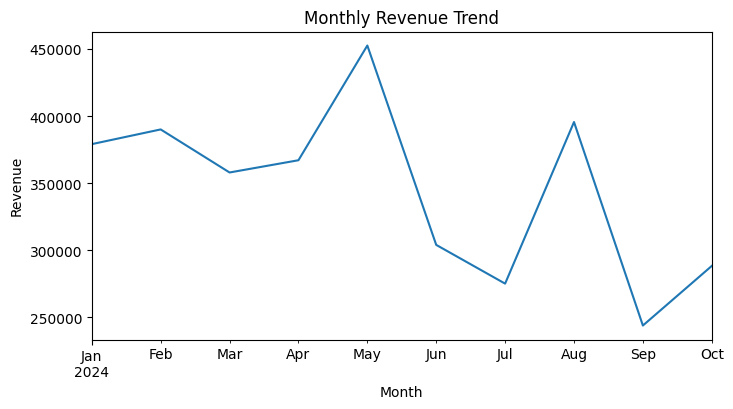

In [7]:
# Monthly Revenue Trend
monthly_revenue = df.groupby(df['order_date'].dt.to_period('M'))['revenue'].sum()
monthly_revenue.plot(title='Monthly Revenue Trend', figsize=(8,4))
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

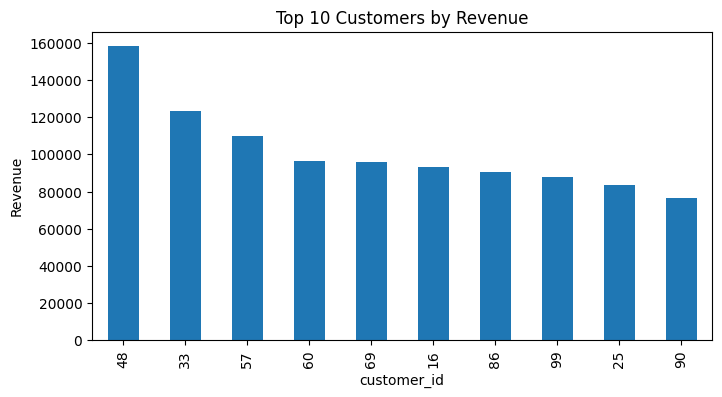

In [9]:
# Top 10 Customers by Revenue
top_customers = df.groupby('customer_id')['revenue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Revenue', figsize=(8,4))
plt.ylabel('Revenue')
plt.show()

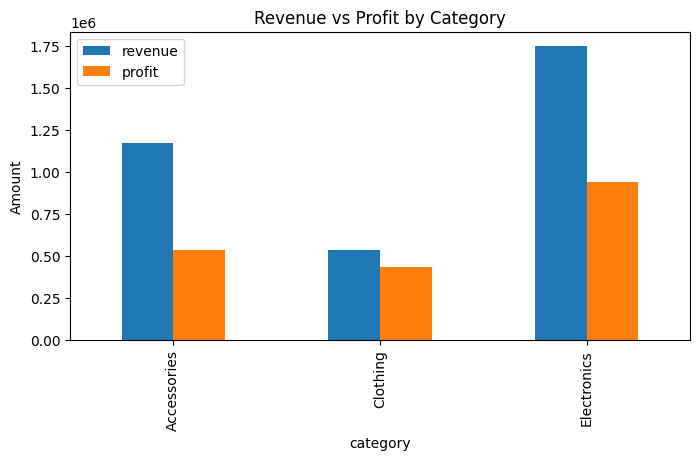

In [10]:
# Product Category Performance
category_performance = df.groupby('category').agg({
    'revenue': 'sum',
    'profit': 'sum'
})

category_performance.plot(kind='bar', figsize=(8,4))
plt.title('Revenue vs Profit by Category')
plt.ylabel('Amount')
plt.show()

In [11]:
# RFM Analysis
snapshot_date = df['order_date'].max() + pd.Timedelta(days=1)

rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'count',
    'revenue': 'sum'
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

In [12]:
# RFM Scoring
rfm['R_score'] = pd.qcut(rfm['recency'], 4, labels=[4,3,2,1])
rfm['F_score'] = pd.qcut(rfm['frequency'], 4, labels=[1,2,3,4])
rfm['M_score'] = pd.qcut(rfm['monetary'], 4, labels=[1,2,3,4])

rfm['RFM_Score'] = rfm[['R_score','F_score','M_score']].astype(int).sum(axis=1)

In [13]:
# Customer Segmentation
def segment_customer(score):
    if score >= 10:
        return 'Champion'
    elif score >= 7:
        return 'Loyal'
    elif score >= 5:
        return 'At Risk'
    else:
        return 'Lost'

rfm['segment'] = rfm['RFM_Score'].apply(segment_customer)

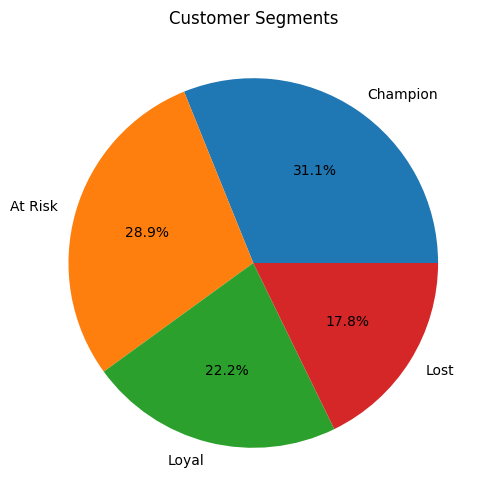

In [14]:
# Segment Distribution
segment_dist = rfm['segment'].value_counts()
segment_dist.plot(kind='pie', autopct='%1.1f%%', title='Customer Segments', figsize=(6,6))
plt.ylabel('')
plt.show()